In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import joblib  # Import joblib for saving the model


In [2]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

In [37]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [41]:
# description of the data
train.describe()



,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,8.975143
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,8.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,19.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,26.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,30.000000


In [42]:
# checking if there is any null values in the data
train.isnull().values.any()

False

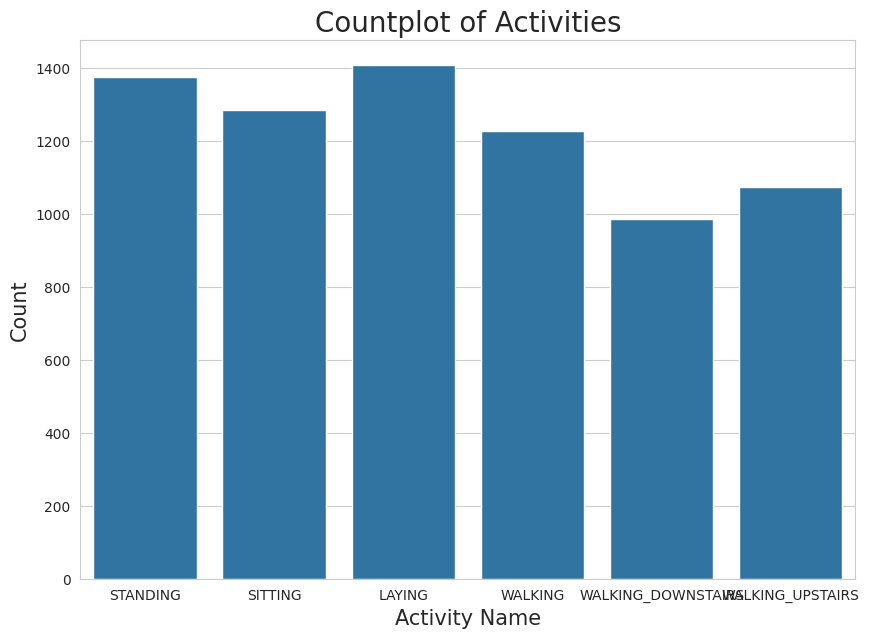

In [46]:
# countplot of activities
plt.figure(figsize=(10,7))
plt.rcParams['font.family'] = 'Dejavu Sans'
sns.set_style('whitegrid')
sns.countplot(x=train['Activity'],data=train)
plt.title('Countplot of Activities',fontsize=20)
plt.xlabel('Activity Name',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.savefig('/content/sample_data')
plt.show()

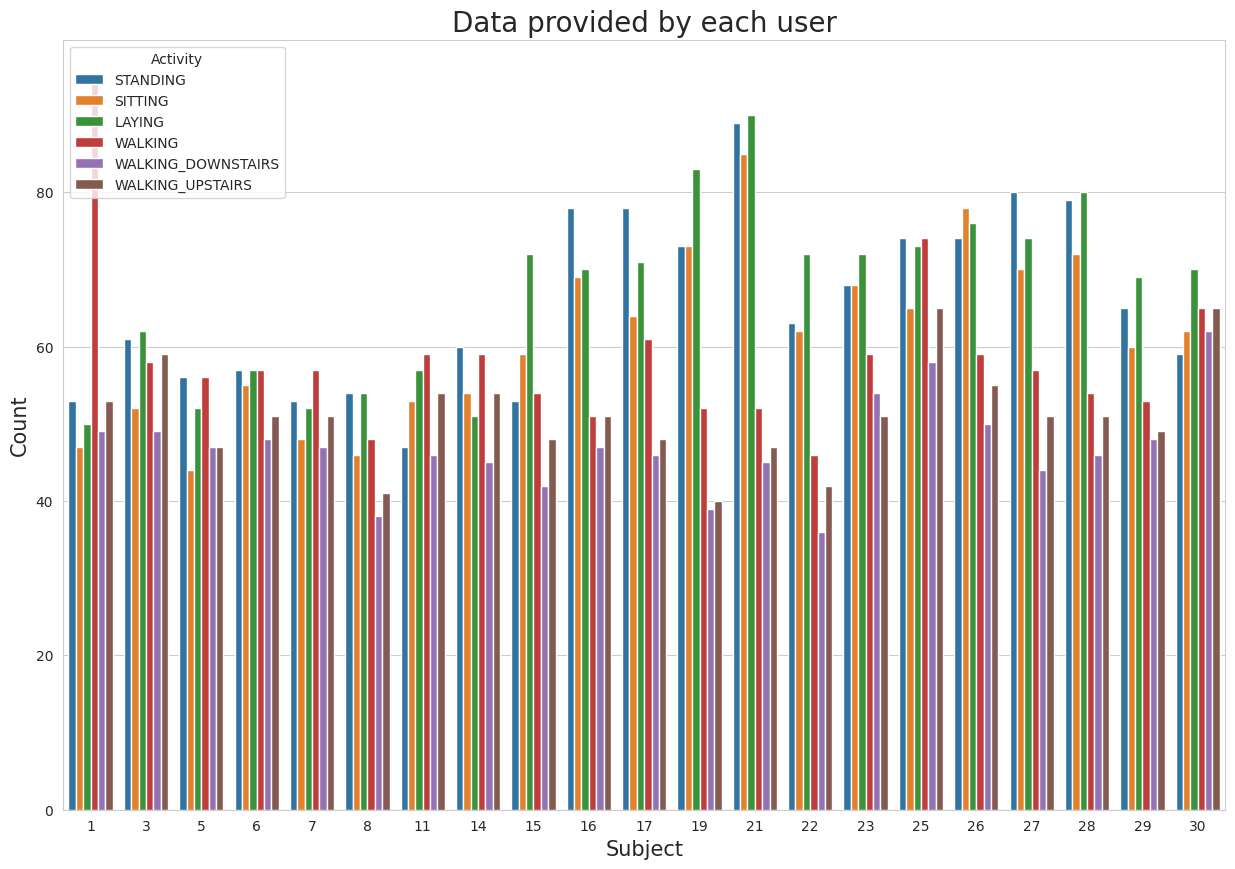

In [47]:
# countplot subject wise
plt.figure(figsize=(15,10))
plt.rcParams['font.family'] = 'Dejavu Sans'
sns.set_style('whitegrid')
plt.title('Data provided by each user', fontsize=20)
sns.countplot(x='subject',hue='Activity', data = train)
plt.xlabel('Subject',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.savefig('/content/sample_data')
plt.show()

In [24]:
print("Shape of Train data: ",train.shape)
print("Shape of Test data: ",test.shape)

# Print the number of features
num_features_train = train.shape[1] - 2  # Subtracting 'subject' and 'Activity'
num_features_test = test.shape[1] - 2    # Subtracting 'subject' and 'Activity'
print(f"Number of features in Train dataset: {num_features_train}")
print(f"Number of features in Test dataset: {num_features_test}")

Shape of Train data:  (7352, 563)
Shape of Test data:  (2947, 563)
Number of features in Train dataset: 561
Number of features in Test dataset: 561


In [32]:
# Display the first few rows of the training dataset
print("\nFirst few rows of the Training dataset:")
print(train.head())

# Display the first few rows of the testing dataset
print("\nFirst few rows of the Testing dataset:")
print(test.head())


First few rows of the Training dataset:
   tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.288585          -0.020294          -0.132905         -0.995279   
1           0.278419          -0.016411          -0.123520         -0.998245   
2           0.279653          -0.019467          -0.113462         -0.995380   
3           0.279174          -0.026201          -0.123283         -0.996091   
4           0.276629          -0.016570          -0.115362         -0.998139   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.983111         -0.913526         -0.995112         -0.983185   
1         -0.975300         -0.960322         -0.998807         -0.974914   
2         -0.967187         -0.978944         -0.996520         -0.963668   
3         -0.983403         -0.990675         -0.997099         -0.982750   
4         -0.980817         -0.990482         -0.998321         -0.979672   

   tBodyAcc-mad

In [11]:
## dividing the data into dependent and independent data
xtrain = train.drop(['subject', 'Activity'], axis=1)
ytrain = train['Activity']

xtest = test.drop(['subject', 'Activity'], axis=1)
ytest = test['Activity']
print("Done....")

Done....


In [12]:
print('xtrain and ytrain : ({},{})'.format(xtrain.shape, ytrain.shape))
print('xtest  and ytest  : ({},{})'.format(xtest.shape, ytest.shape))

xtrain and ytrain : ((7352, 561),(7352,))
xtest  and ytest  : ((2947, 561),(2947,))


# Scaling the Data

In [13]:
sc = StandardScaler()
xtrain  = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

In [14]:
labels=['LAYING', 'SITTING','STANDING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS']

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
parameters = {'C':[0.01, 0.1, 1, 10, 20, 30], 'penalty':['l2','l1']}
log_reg = LogisticRegression(max_iter=1000)
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1, n_jobs=-1)
log_reg_grid.fit(xtrain,ytrain)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
18 fits failed out of a total of 36.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1194, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/us

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 20, 30],
                         'penalty': ['l2', 'l1']},
             verbose=1)

In [16]:
print(log_reg_grid.best_params_)

{'C': 1, 'penalty': 'l2'}


In [17]:
from sklearn import metrics
ypred = log_reg_grid.predict(xtest)
print("Accuracy score is: ",metrics.accuracy_score(ytest,ypred)*100)

Accuracy score is:  95.52086868001356


In [18]:
cf_log = metrics.confusion_matrix(ytest,ypred)
print("confusion metrics: \n",cf_log)

confusion metrics: 
 [[532   0   5   0   0   0]
 [  1 430  58   0   0   2]
 [  0  13 519   0   0   0]
 [  0   0   0 493   3   0]
 [  0   0   2   6 394  18]
 [  0   0   0  23   1 447]]


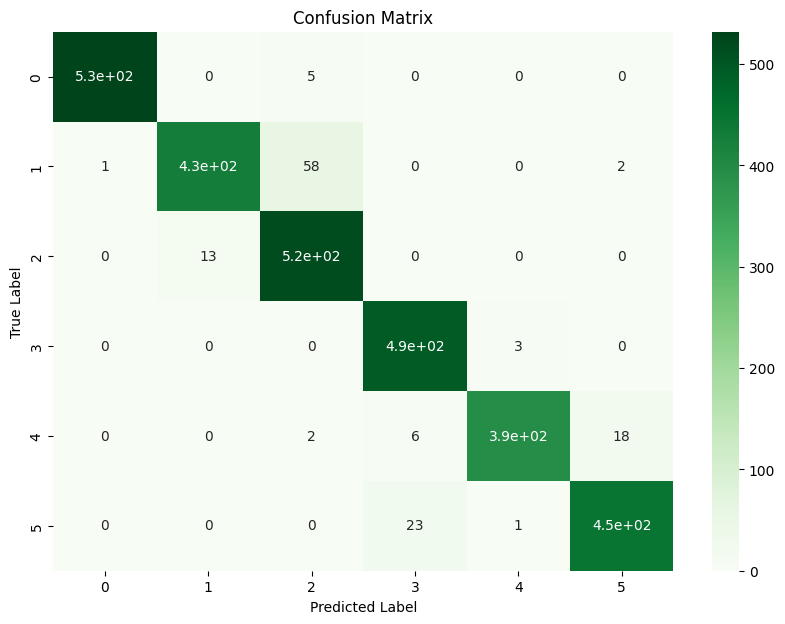

In [28]:
plt.figure(figsize=(10,7))
sns.heatmap(cf_log,annot=True,cmap=plt.cm.Greens)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [36]:

# Create 5 random inputs (example with 561 features, adjust according to your dataset)
num_samples = 5
num_features = 561  # Replace this with the actual number of features in your dataset
random_inputs = np.random.rand(num_samples, num_features)

# Scale the random inputs using the previously fitted scaler
scaler = StandardScaler()
# Note: You should use the same scaler that was fitted on your training data.
# Here we assume that 'sc' is your fitted StandardScaler from training.
random_inputs_scaled = scaler.fit_transform(random_inputs)

# Predict using the trained model
# Assuming log_reg_grid is your trained model from previous steps
predicted_activities = log_reg_grid.predict(random_inputs_scaled)

# Map the predicted labels to their corresponding activities
true_labels = ['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS']

# Display input features and predicted activities
for i in range(num_samples):
    # Get the predicted activity label directly from predicted_activities
    predicted_label = predicted_activities[i]
    print(f"Input features for sample {i+1}: {random_inputs[i]}")
    print(f"The predicted activity for sample {i+1} is: {predicted_label}\n") # Use predicted_label instead of indexing into labels


Input features for sample 1: [3.39557118e-01 4.31047762e-01 5.49111735e-01 9.67826011e-01
 9.93461742e-01 5.96795214e-01 5.32466046e-01 6.01261010e-01
 3.56487483e-01 1.24365478e-03 5.38956298e-01 6.33748832e-01
 1.52127957e-01 6.68951082e-01 4.44339470e-01 3.96331403e-01
 6.17759450e-01 7.49727089e-03 3.30954134e-01 3.39744165e-01
 4.09995371e-01 7.68735136e-01 4.66288497e-01 8.20575225e-01
 7.44732667e-02 8.78264526e-01 2.34376994e-01 3.30337240e-01
 9.27828277e-01 3.43350033e-01 3.54164583e-01 9.40596885e-01
 6.40652992e-01 5.23842309e-01 4.98057278e-01 5.02502286e-01
 6.38848164e-01 7.67146830e-01 2.26444353e-01 5.66461720e-01
 8.68013955e-01 5.62459218e-01 3.13551568e-01 9.63916507e-01
 4.06163417e-01 3.23406509e-01 9.10761484e-01 1.56774642e-01
 4.33274546e-01 7.01729732e-01 9.54185040e-01 1.53211275e-01
 4.29416573e-01 1.63569348e-01 9.64525791e-01 8.97984787e-01
 8.97131038e-01 9.60492697e-02 8.06895065e-01 4.57634955e-01
 9.51873356e-01 3.51303356e-01 9.00208771e-01 2.08146565

In [31]:
# Save the trained model and scaler for future use
joblib.dump(log_reg_grid, 'HAR_MODEL.pkl')  # Save the trained model
joblib.dump(sc, 'scaler.pkl')                # Save the scaler

print("Model and scaler have been saved successfully.")

Model and scaler have been saved successfully.
